## Загрузка датасета

In [1]:
import pandas as pd
import numpy as np

In [2]:
FILE_TYPE = 'csv'
df_original = []
if FILE_TYPE == 'xlsx':
    HABR_DATASET_PATH = 'habr.xlsx'
    df_original = pd.read_excel(HABR_DATASET_PATH)
elif FILE_TYPE == 'csv':
    HABR_DATASET_PATH = 'vacancies_data.csv'
    df_original = pd.read_csv(HABR_DATASET_PATH, encoding='utf8')

In [3]:
df_original

,Ссылка на объявление,Дата размещения,Название,Зарплата от,Зарплата до,Валюта,Вакансия,Стаж,Требования,Город,Тип занятости,Можно удаленно,Описание,Работодатель,Ссылка на работодателя,Рейтинг,Офисы,Число сотрудников,Дата сбора данных
0,https://career.habr.com/vacancies/1000144781,2024-06-27 16:50:48,Архитектор серверной инфраструктуры,NaN,500000.0,₽,Архитектор программного обеспечения,Старший (Senior),JavaScript / Node.js / Python / Elasticsearch ...,Москва,Полный рабочий день,NaN,~~~ О компании и команде\nО нас: Амбициозная к...,Ваша кадровая служба,https://vks.agency,NaN,"Россия, Москва, ул. Атарбекова, д. 4",0.0,2024-07-01 23:06:03
1,https://career.habr.com/vacancies/1000139937,2024-06-28 10:40:49,Руководитель группы FI/CO/FM,NaN,NaN,NaN,Менеджер технической поддержки,NaN,SAP / ABAP,Москва,Полный рабочий день,True,~~~ О компании и команде\nМеждународная сеть м...,Fix Price,https://fix-price.ru/,NaN,"Россия, Москва, Щепкина, д.33",2.0,2024-07-01 23:06:03
2,https://career.habr.com/vacancies/1000143735,2024-06-04 16:24:59,Intern Project Manager,5000.0,25000.0,₽,Менеджер проекта,Стажёр (Intern),Управление проектами / Agile / Управление риск...,"Москва, Санкт-Петербург, Казань",Полный рабочий день,True,~~~ О компании и команде\nКомпания FedAG - быс...,FedAG,https://career.habr.com/companies/fedag,4.90,"Россия, Санкт-Петербург, Институтский переулок 5",1.0,2024-07-01 23:06:04
3,https://career.habr.com/vacancies/1000143869,2024-07-01 12:09:30,"Middle+ Backend (Node.js, TypeScript) Developer",210000.0,NaN,₽,Бэкенд разработчик,Средний (Middle),Node.js / TypeScript / MongoDB / Redis,NaN,Полный рабочий день,True,~~~ О компании и команде\nОптимакрос – крупный...,Optimacros,https://optimacros.com,NaN,"Россия, Москва, Дмитровское шоссе, 81",0.0,2024-07-01 23:06:04
4,https://career.habr.com/vacancies/1000144076,2024-06-25 19:33:45,Системный аналитик,NaN,NaN,NaN,Системный аналитик,NaN,SQL / REST,NaN,NaN,True,~~~ О компании и команде\nОбязанности: Наша ко...,IBS,http://www.ibs.ru/,4.38,"Россия, Омск, ул. Маяковского, 74А\nРоссия, Ша...",12.0,2024-07-01 23:06:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,https://career.habr.com/vacancies/1000144598,2024-06-26 11:03:21,Ведущий программист 1C,NaN,250000.0,₽,Программист 1С,Старший (Senior),Разработка под 1С,NaN,Полный рабочий день,True,"~~~ О компании и команде\nКрафтье Компания """" ...",Bullevie,https://bullevie.ru/,NaN,"Россия, Санкт-Петербург, гп.Федоровское, ул.Пр...",0.0,2024-07-01 23:23:50
3195,https://career.habr.com/vacancies/1000143341,2024-06-25 17:01:12,Software Architect (NGFW),NaN,NaN,NaN,Архитектор программного обеспечения,NaN,Разработка программного обеспечения / Проектир...,NaN,NaN,True,~~~ О компании и команде\nNext Generation Fire...,Лаборатория Касперского,https://kaspersky.ru/,4.20,"Россия, Москва, Ленинградское ш., д. 39А, стр....",7.0,2024-07-01 23:23:50
3196,https://career.habr.com/vacancies/1000144180,2024-06-28 14:36:00,Data Center Infrastructure Engineer / Инженер ...,NaN,NaN,NaN,Системный администратор,Средний (Middle),Администрирование Linux / Bash / Osi model,Санкт-Петербург,Полный рабочий день,NaN,~~~ О компании и команде\nYADRO — это российск...,YADRO,https://yadro.com,NaN,"Россия, Москва, ул. Рочдельская, д. 15, стр. 1...",5.0,2024-07-01 23:23:50
3197,https://career.habr.com/vacancies/1000141715,2024-07-01 12:23:49,Ведущий инженер OpenStack,NaN,NaN,NaN,Инженер по доступности сервисов,Старший (Senior),Linux / Ansible / Terraform,Москва,Полный рабочий день,NaN,~~~ О компании и команде\nМы привлекаем амбици...,Cloud.ru,https://cloud.ru,4.75,"Россия, Москва, ул. 2-я Звенигородская, д. 28",4.0,2024-07-01 23:23:51


In [4]:
df_original.isna().sum()

Ссылка на объявление         0
Дата размещения              0
Название                     0
Зарплата от               2667
Зарплата до               2818
Валюта                    2543
Вакансия                     0
Стаж                       756
Требования                   0
Город                     1075
Тип занятости              339
Можно удаленно            1194
Описание                     0
Работодатель                94
Ссылка на работодателя      94
Рейтинг                   1217
Офисы                      406
Число сотрудников           94
Дата сбора данных            0
dtype: int64

In [5]:
valide_cols = [
    'Дата размещения',
    'Вакансия',
    'Стаж',
    'Зарплата от',
    'Зарплата до',
    'Город',
    'Дата сбора данных',
    'Число сотрудников',
    'Тип занятости',
    'Можно удаленно',
]
def get_valide_cols(dataset, cols):
    return dataset[cols]

In [6]:
exchange_rate_template = {
    "₽": 1,
    "$": 92.37,
    "€": 99.53,
    "₸": 0.206
}
def apply_exchange_rate(row, template=exchange_rate_template):
    row["Зарплата от"] = row["Зарплата от"] * exchange_rate_template[row["Валюта"]] if pd.notna(row["Зарплата от"]) else np.nan
    row["Зарплата до"] = row["Зарплата до"] * exchange_rate_template[row["Валюта"]] if pd.notna(row["Зарплата до"]) else np.nan
    return row

In [7]:
def get_difference_percentiles(df):
    filtered_df = df.dropna(subset=['Зарплата от', 'Зарплата до']).copy()
    filtered_df['Разница'] = filtered_df['Зарплата до'] - filtered_df['Зарплата от']
    condition = filtered_df['Разница'] > 0.8 * filtered_df['Зарплата до']
    filtered_df.loc[condition, ['Зарплата от', 'Разница']] = np.nan

    filtered_df = filtered_df.dropna(subset=['Зарплата от', 'Зарплата до'])

    filtered_df = filtered_df[filtered_df['Зарплата от'] >= 1000]
    filtered_df = filtered_df[filtered_df['Зарплата до'] >= 10000]

    filtered_df['Коэффициент разницы'] = np.where(filtered_df['Зарплата до'] != 0,
                                                      filtered_df['Разница'] / filtered_df['Зарплата до'],
                                                      np.nan)

    perc25 = filtered_df['Коэффициент разницы'].quantile(0.25)
    perc50 = filtered_df['Коэффициент разницы'].quantile(0.50)
    perc75 = filtered_df['Коэффициент разницы'].quantile(0.75)

    return perc25, perc50, perc75


def fill_na_salary(df, coef):
    result_df = df.copy()
    result_df['Зарплата до'] = result_df['Зарплата до'].fillna(result_df['Зарплата от'] / (1-coef))
    result_df['Зарплата от'] = result_df['Зарплата от'].fillna(result_df['Зарплата до'] * (1-coef))
    return result_df

In [8]:
import re

def separate_cities(df):
  work_df = df.copy()
  df_new = pd.DataFrame()
  for index in range(work_df.shape[0]):
    row = re.sub("[\(\[].*?[\)\]]", "", work_df['Город'].iloc[index])
    cities = [city.lstrip().rstrip() for city in row.split(',')]
    init_row = work_df.iloc[index].copy()
    for city in cities:
      new_row = init_row.copy()
      new_row['Город'] = city
      df_new = pd.concat([df_new, pd.DataFrame([new_row])], ignore_index=True)
  return df_new

def find_cities_around_threshold(df, threshold=75):
  cities = df['Город'].unique()
  ratios = {}
  for city in cities:
    ratios[city] = df['Город'].value_counts()[city]/df.shape[0]

  answer = []
  all_percentage = 0
  sorted_dict = {k: v for k, v in sorted(ratios.items(), key=lambda item: item[1], reverse=True)}
  for label, pct in sorted_dict.items():
      all_percentage += pct*100
      if all_percentage < threshold:
          answer.append(label)
  return answer

def create_new_cities(df, cities):
  df_new = df.copy()
  for index in range(df_new.shape[0]):
    if (df_new.iloc[index]['Город'] not in cities):
      df_new.at[index, 'Город'] = 'Малый город'
  return df_new

In [9]:
def fillna_experience_with_vacancy(df):
    dataset = df.copy()

    mean_wages = dataset.groupby(['Вакансия', 'Стаж']).agg({'Зарплата от': 'mean', 'Зарплата до': 'mean'}).reset_index()
    mean_wages['Средняя зарплата'] = (mean_wages['Зарплата от'] + mean_wages['Зарплата до']) / 2

    for i, row in dataset.iterrows():
        if pd.isna(row['Стаж']):
            min_wage = row['Зарплата от']
            max_wage = row['Зарплата до']
            avg_wage = (min_wage + max_wage) / 2
            vacancy_name = row['Вакансия']

            closest_experience = None
            smallest_diff = float('inf')
            for _, r in mean_wages[mean_wages['Вакансия'] == vacancy_name].iterrows():
                wage_diff = abs(avg_wage - r['Средняя зарплата'])
                if wage_diff < smallest_diff:
                    smallest_diff = wage_diff
                    closest_experience = r['Стаж']

            dataset.loc[i, "Стаж"] = closest_experience

    return dataset


def fillna_experience_with_wages(df):
    dataset = df.copy()

    mean_wages = dataset.groupby(['Стаж']).agg({'Зарплата от': 'mean', 'Зарплата до': 'mean'}).reset_index()
    mean_wages['Средняя зарплата'] = (mean_wages['Зарплата от'] + mean_wages['Зарплата до']) / 2

    for i, row in dataset.iterrows():
        if pd.isna(row['Стаж']):
            min_wage = row['Зарплата от']
            max_wage = row['Зарплата до']
            avg_wage = (min_wage + max_wage) / 2

            closest_experience = None
            smallest_diff = float('inf')
            for _, r in mean_wages.iterrows():
                wage_diff = abs(avg_wage - r['Средняя зарплата'])
                if wage_diff < smallest_diff:
                    smallest_diff = wage_diff
                    closest_experience = r['Стаж']

            dataset.loc[i, "Стаж"] = closest_experience

    return dataset

Удаляем строки, в которых одновременно отсутствует информация о зарплате в обоих столбцах. Заменяем пропуски нулями и делаем столбец категориальным. Заполняем столбец "Город"

In [10]:
def preprocessing_data(df):
   df_new = df.copy()

   missing_data = df_new[df["Зарплата от"].isnull() & df_new["Зарплата до"].isnull()]
   df_new = df_new.drop(missing_data.index)

   df_new['Можно удаленно'].fillna(0, inplace=True)
   df_new['Можно удаленно'] = df_new['Можно удаленно'].astype('int64')
   df_new['Можно удаленно'] = df_new['Можно удаленно'].apply(lambda x: "Да" if x == 1 else "Нет")

   df_new.loc[(df_new['Можно удаленно'] == "Нет") & (df_new['Город'].isnull()), 'Город'] = 'Не указано'
   df_new.loc[(df_new['Можно удаленно'] == "Да") & (df_new['Город'].isnull()), 'Город'] = 'Удаленно'

   df_new['Тип занятости'].fillna('Не указан', inplace=True)

   df_new['Число сотрудников'].fillna(0, inplace=True)
   df_new['Число сотрудников'] = df_new['Число сотрудников'].astype('int64')

   df_new = df_new.apply(apply_exchange_rate, axis=1)
   df_new.drop("Валюта", axis=1, inplace=True)

   perc25, perc50, perc75 = get_difference_percentiles(df_new)
   df_filled_salary = fill_na_salary(df_new, perc50)

   # df_exp = fillna_experience_with_vacancy(df_25)

   df_result = get_valide_cols(df_filled_salary, valide_cols)
   return df_result


def sep_cities_data(df):
    df_new = df.copy()

    df_new = separate_cities(df_new)
    # cities = find_cities_around_threshold(df_new, 85)
    # df_new = create_new_cities(df_new, cities)

    return df_new

In [11]:
df_prep = preprocessing_data(df_original)
# df_exp_vac = fillna_experience_with_vacancy(df_prep)
df_exp = fillna_experience_with_wages(df_prep) # fillna_experience_with_wages(df_exp_vac)
df_sep_cities = sep_cities_data(df_exp)

In [12]:
def analysis_missing_values_vacancy(df):
    data = df.copy()

    data['Наименьшая зарплата'] = data['Зарплата от']
    data['Наибольшая зарплата'] = data['Зарплата до']

    vacancy_missing_values = data['Стаж'].isnull().groupby(data['Вакансия']).mean()
    wages_values = data.groupby(['Вакансия', 'Стаж']).agg({'Зарплата от': 'mean',
                                                           'Зарплата до': 'mean',
                                                           'Наименьшая зарплата': 'min',
                                                           'Наибольшая зарплата': 'max'})

    return vacancy_missing_values[vacancy_missing_values > 0.15], wages_values

In [13]:
df_analysis, df_wages = analysis_missing_values_vacancy(df_prep)
df_analysis.sort_values()

Вакансия
Инженер технической поддержки          0.153846
ML разработчик                         0.166667
Архитектор программного обеспечения    0.166667
Менеджер по найму                      0.166667
Системный инженер                      0.166667
Бэкенд разработчик                     0.202614
Инженер по ручному тестированию        0.210526
Менеджер технической поддержки         0.250000
Инженер по производительности          0.333333
Инженер по компьютерному зрению        0.333333
Разработчик приложений                 0.400000
Менеджер по маркетингу                 0.500000
ERP-программист                        0.500000
Директор проекта                       0.500000
Технический директор                   0.500000
Директор по маркетингу                 1.000000
Менеджер по обеспечению качества       1.000000
Антифрод аналитик                      1.000000
Администратор сайта                    1.000000
Name: Стаж, dtype: float64

In [14]:
# from matplotlib import pyplot as plt

# plt.figure(figsize=(8, 8))
# plt.pie(df_analysis, labels=df_analysis.index, autopct='%1.1f%%', startangle=140)
# plt.axis('equal')  # Равные пропорции для круговой диаграммы
# plt.title('Доля пропущенных значений стажа по вакансиям')
# plt.show()

In [15]:
df_wages

Зарплата от    Зарплата до  \
Вакансия            Стаж                                             
DevOps-инженер      Младший (Junior)   93333.333333  171666.666667   
                    Средний (Middle)  201224.035088  302625.526316   
                    Стажёр (Intern)    40000.000000   60000.000000   
                    Старший (Senior)  366777.500000  505198.750000   
ERP-программист     Средний (Middle)  150000.000000  200000.000000   
...                                             ...            ...   
Фулстек разработчик Младший (Junior)   50000.000000  120000.000000   
                    Средний (Middle)  146406.877193  222743.868421   
                    Стажёр (Intern)    40000.000000   60000.000000   
                    Старший (Senior)  323355.000000  478573.277778   
Юрист               Старший (Senior)  100000.000000  150000.000000   

                                      Наименьшая зарплата  Наибольшая зарплата  
Вакансия            Стаж                                                        
DevOps-инженер      Младший (Junior)              60000.0             250000.0  
                    Средний (Middle)              50000.0             692775.0  
                    Стажёр (Intern)               40000.0              60000.0  
                    Старший (Senior)             250000.0             646590.0  
ERP-программист     Средний (Middle)             150000.0             200000.0  
...                                                   ...                  ...  
Фулстек разработчик Младший (Junior)              50000.0             120000.0  
                    Средний (Middle)              40000.0             450000.0  
                    Стажёр (Intern)               40000.0              60000.0  
                    Старший (Senior)             150000.0             671827.5  
Юрист               Старший (Senior)             100000.0             150000.0  

[153 rows x 4 columns]

In [16]:
df_analysis_uniq_exp = df_prep.groupby(['Вакансия'])['Стаж'].agg(['unique'])
df_analysis_uniq_exp

,unique
Вакансия,
DevOps-инженер,"[Старший (Senior), Средний (Middle), nan, Млад..."
ERP-программист,"[Средний (Middle), nan]"
HTML-верстальщик,[Средний (Middle)]
ML разработчик,"[Средний (Middle), nan, Стажёр (Intern), Старш..."
PR-менеджер,[Стажёр (Intern)]
...,...
Технический писатель,"[Средний (Middle), Старший (Senior), Стажёр (I..."
Ученый по данным,"[Стажёр (Intern), Старший (Senior)]"
Фронтенд разработчик,"[Средний (Middle), Младший (Junior), Старший (..."


In [17]:
filtered_df = df_analysis_uniq_exp[df_analysis_uniq_exp.apply(lambda x : len(x['unique']) <= 1, axis=1)]
filtered_df

,unique
Вакансия,
HTML-верстальщик,[Средний (Middle)]
PR-менеджер,[Стажёр (Intern)]
SMM-специалист,[Стажёр (Intern)]
Администратор защиты,[Средний (Middle)]
Администратор сайта,[nan]
Аналитик мобильных приложений,[Средний (Middle)]
Аналитик по обеспечению качества,[Средний (Middle)]
Аналитик продаж,[Средний (Middle)]
Аналитик технической поддержки,[Средний (Middle)]


In [18]:
filtered_df.shape

(25, 1)

In [19]:
df_anal = df_exp.copy()
df_anal['Наименьшая зарплата'] = df_anal['Зарплата от']
df_anal['Наибольшая зарплата'] = df_anal['Зарплата до']
df_anal.groupby(['Стаж']).agg({
    'Зарплата от': 'mean',
    'Зарплата до': 'mean',
    'Наименьшая зарплата': 'min',
    'Наибольшая зарплата': 'max'
})

,Зарплата от,Зарплата до,Наименьшая зарплата,Наибольшая зарплата
Стаж,,,,
Младший (Junior),75377.235507,120854.478261,36000.0,250000.0
Средний (Middle),155139.248036,230610.065657,38000.0,692775.0
Стажёр (Intern),44490.862069,70429.137931,5000.0,369480.0
Старший (Senior),272772.456853,409829.121827,92370.0,1492950.0


In [20]:
df_prep[df_prep['Вакансия'] == 'Инженер по производительности']

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
469,2024-07-01 12:27:12,Инженер по производительности,NaN,166666.666667,250000.0,Удаленно,2024-07-01 23:08:37,10,Полный рабочий день,Да
516,2024-07-01 19:27:15,Инженер по производительности,Старший (Senior),230000.000000,345000.0,Москва,2024-07-01 23:08:53,83,Полный рабочий день,Нет
2981,2024-06-28 11:42:14,Инженер по производительности,Старший (Senior),233333.333333,350000.0,Москва,2024-07-01 23:22:39,6,Полный рабочий день,Нет


In [21]:
df_exp[df_exp['Вакансия'] == 'Инженер по производительности']

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
469,2024-07-01 12:27:12,Инженер по производительности,Средний (Middle),166666.666667,250000.0,Удаленно,2024-07-01 23:08:37,10,Полный рабочий день,Да
516,2024-07-01 19:27:15,Инженер по производительности,Старший (Senior),230000.000000,345000.0,Москва,2024-07-01 23:08:53,83,Полный рабочий день,Нет
2981,2024-06-28 11:42:14,Инженер по производительности,Старший (Senior),233333.333333,350000.0,Москва,2024-07-01 23:22:39,6,Полный рабочий день,Нет


In [22]:
df_exp

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
0,2024-06-27 16:50:48,Архитектор программного обеспечения,Старший (Senior),333333.333333,500000.0,Москва,2024-07-01 23:06:03,0,Полный рабочий день,Нет
2,2024-06-04 16:24:59,Менеджер проекта,Стажёр (Intern),5000.000000,25000.0,"Москва, Санкт-Петербург, Казань",2024-07-01 23:06:04,1,Полный рабочий день,Да
3,2024-07-01 12:09:30,Бэкенд разработчик,Средний (Middle),210000.000000,315000.0,Удаленно,2024-07-01 23:06:04,0,Полный рабочий день,Да
8,2024-06-04 09:23:18,Менеджер по найму,Стажёр (Intern),66666.666667,100000.0,Удаленно,2024-07-01 23:06:06,0,Полный рабочий день,Да
18,2024-06-06 13:34:21,Менеджер технической поддержки,Средний (Middle),60000.000000,90000.0,Удаленно,2024-07-01 23:06:10,0,Полный рабочий день,Да
...,...,...,...,...,...,...,...,...,...,...
3153,2024-07-01 13:29:52,Веб-разработчик,Средний (Middle),200000.000000,300000.0,Москва,2024-07-01 23:23:36,0,Полный рабочий день,Нет
3160,2024-06-03 15:46:09,Фулстек разработчик,Стажёр (Intern),40000.000000,60000.0,Москва,2024-07-01 23:23:39,1,Неполный рабочий день,Да
3176,2024-06-26 13:17:01,DevOps-инженер,Старший (Senior),400000.000000,600000.0,Удаленно,2024-07-01 23:23:44,0,Полный рабочий день,Да
3181,2024-06-27 10:06:33,Фулстек разработчик,Старший (Senior),300000.000000,450000.0,Екатеринбург,2024-07-01 23:23:45,0,Полный рабочий день,Нет


<ipython-input-23-8f89aa1706c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_exp, x='Зарплата от', y='Стаж', inner='box', palette='Dark2')


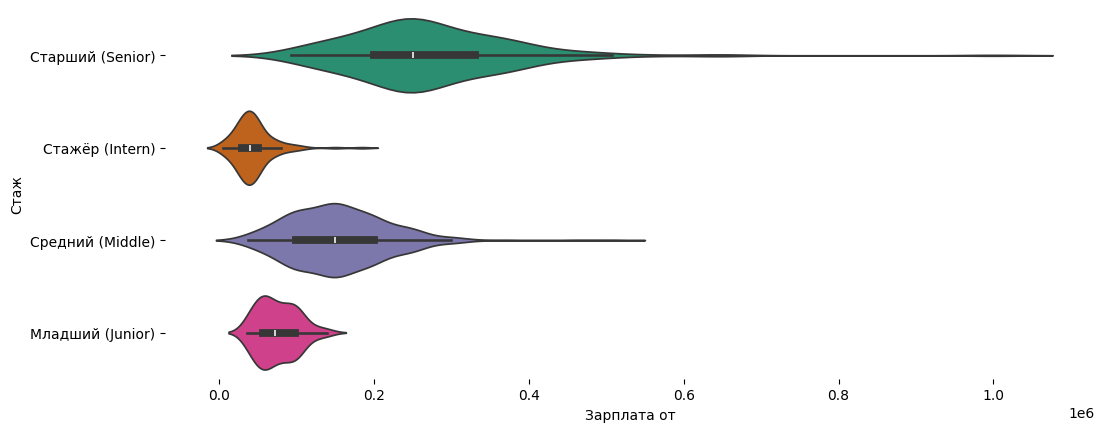

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_exp['Стаж'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_exp, x='Зарплата от', y='Стаж', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [24]:
df_sep_cities

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
0,2024-06-27 16:50:48,Архитектор программного обеспечения,Старший (Senior),333333.333333,500000.0,Москва,2024-07-01 23:06:03,0,Полный рабочий день,Нет
1,2024-06-04 16:24:59,Менеджер проекта,Стажёр (Intern),5000.000000,25000.0,Москва,2024-07-01 23:06:04,1,Полный рабочий день,Да
2,2024-06-04 16:24:59,Менеджер проекта,Стажёр (Intern),5000.000000,25000.0,Санкт-Петербург,2024-07-01 23:06:04,1,Полный рабочий день,Да
3,2024-06-04 16:24:59,Менеджер проекта,Стажёр (Intern),5000.000000,25000.0,Казань,2024-07-01 23:06:04,1,Полный рабочий день,Да
4,2024-07-01 12:09:30,Бэкенд разработчик,Средний (Middle),210000.000000,315000.0,Удаленно,2024-07-01 23:06:04,0,Полный рабочий день,Да
...,...,...,...,...,...,...,...,...,...,...
761,2024-07-01 13:29:52,Веб-разработчик,Средний (Middle),200000.000000,300000.0,Москва,2024-07-01 23:23:36,0,Полный рабочий день,Нет
762,2024-06-03 15:46:09,Фулстек разработчик,Стажёр (Intern),40000.000000,60000.0,Москва,2024-07-01 23:23:39,1,Неполный рабочий день,Да
763,2024-06-26 13:17:01,DevOps-инженер,Старший (Senior),400000.000000,600000.0,Удаленно,2024-07-01 23:23:44,0,Полный рабочий день,Да
764,2024-06-27 10:06:33,Фулстек разработчик,Старший (Senior),300000.000000,450000.0,Екатеринбург,2024-07-01 23:23:45,0,Полный рабочий день,Нет


In [25]:
df_exp.isna().sum()

Дата размещения      0
Вакансия             0
Стаж                 0
Зарплата от          0
Зарплата до          0
Город                0
Дата сбора данных    0
Число сотрудников    0
Тип занятости        0
Можно удаленно       0
dtype: int64

In [26]:
df_sep_cities.isna().sum()

Дата размещения      0
Вакансия             0
Стаж                 0
Зарплата от          0
Зарплата до          0
Город                0
Дата сбора данных    0
Число сотрудников    0
Тип занятости        0
Можно удаленно       0
dtype: int64

In [27]:
df_sep_cities['Город'].unique()

array(['Москва', 'Санкт-Петербург', 'Казань', 'Удаленно', 'Новый Уренгой',
       'Краснодар', 'Омск', 'Самара', 'Екатеринбург', 'Ростов-на-Дону',
       'Тюмень', 'Нижний Новгород', 'Липецк', 'Барнаул', 'Новосибирск',
       'Томск', 'Стерлитамак', 'Токио', 'Набережные Челны', 'Ставрополь',
       'Псков', 'Лимассол', 'Пенза', 'Саратов', 'Уфа', 'Кемерово',
       'Севастополь', 'Челябинск', 'Воронеж', 'Пушкино', 'Рязань',
       'Брянск', 'Хошимин', 'Ханой', 'Дананг', 'Пермь', 'Кострома',
       'Коломна', 'Таллин', 'Хабаровск', 'Калининград', 'Владивосток',
       'Тель-Авив', 'Красноярск', 'Симферополь', 'Астрахань', 'Иркутск',
       'Ханты-Мансийск', 'Сочи', 'Ижевск', 'Тольятти', 'Энгельс',
       'Майкоп', 'Химки', 'Бердск', 'Курган', 'Ярославль', 'Балашиха',
       'Зеленоград', 'Чебоксары', 'Ульяновск', 'Лос-Анджелес', 'Салехард',
       'Минск', 'Дубай', 'Донецк', 'Тула', 'Иваново', 'Комсомольск'],
      dtype=object)

In [28]:
# Эспорт общей и городской базы данных
df_exp.to_excel("habr_general.xlsx")
df_sep_cities.to_excel("habr_multicity.xlsx")

In [29]:
df_exp.groupby('Стаж').describe()

Зарплата от                                                   \
                       count           mean            std      min       25%   
Стаж                                                                            
Младший (Junior)        46.0   75377.235507   25501.675833  36000.0   56566.5   
Средний (Middle)       297.0  155139.248036   65469.871706  38000.0  100000.0   
Стажёр (Intern)        116.0   44490.862069   26267.884935   5000.0   30000.0   
Старший (Senior)       197.0  272772.456853  109946.316272  92370.0  200000.0   

                                                Зарплата до                 \
                       50%       75%        max       count           mean   
Стаж                                                                         
Младший (Junior)   71975.0   98092.5   140000.0        46.0  120854.478261   
Средний (Middle)  150000.0  200000.0   508035.0       297.0  230610.065657   
Стажёр (Intern)    40000.0   50000.0   184740.0       116.0   70429.137931   
Старший (Senior)  250000.0  330000.0  1000000.0       197.0  409829.121827   

                  ...                      Число сотрудников            \
                  ...       75%        max             count      mean   
Стаж              ...                                                    
Младший (Junior)  ...  150000.0   250000.0              46.0  3.478261   
Средний (Middle)  ...  285000.0   692775.0             297.0  4.811448   
Стажёр (Intern)   ...   80000.0   369480.0             116.0  0.887931   
Старший (Senior)  ...  480000.0  1492950.0             197.0  4.593909   

                                                       
                        std  min  25%  50%  75%   max  
Стаж                                                   
Младший (Junior)  12.448541  0.0  0.0  0.0  2.0  83.0  
Средний (Middle)  16.550439  0.0  0.0  0.0  2.0  83.0  
Стажёр (Intern)    2.365592  0.0  0.0  0.0  1.0  12.0  
Старший (Senior)  13.689992  0.0  0.0  0.0  4.0  83.0  

[4 rows x 24 columns]

In [30]:
df_outliers = df_exp[['Стаж', 'Зарплата от', 'Зарплата до']].copy()
df_outliers['Средняя зарплата'] = (df_outliers['Зарплата до'] + df_outliers['Зарплата до']) / 2
df_outliers['Разница'] = df_outliers['Зарплата до'] - df_outliers['Зарплата от']
df_outliers.drop(['Зарплата от', 'Зарплата до'], axis=1, inplace=True)
df_outliers

,Стаж,Средняя зарплата,Разница
0,Старший (Senior),500000.0,166666.666667
2,Стажёр (Intern),25000.0,20000.000000
3,Средний (Middle),315000.0,105000.000000
8,Стажёр (Intern),100000.0,33333.333333
18,Средний (Middle),90000.0,30000.000000
...,...,...,...
3153,Средний (Middle),300000.0,100000.000000
3160,Стажёр (Intern),60000.0,20000.000000
3176,Старший (Senior),600000.0,200000.000000
3181,Старший (Senior),450000.0,150000.000000


In [31]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2


def simple_matching_distance(row, reference):
    return sum(row != reference)


def mahalanobis_distance(row, mean, inv_cov_matrix):
    return mahalanobis(row, mean, inv_cov_matrix)


In [32]:
data = df_outliers.copy()

## label encoder variant
# label_encoder = LabelEncoder()
# data['category_encoded'] = label_encoder.fit_transform(data['Стаж'])

# one-hot encoder variant
data = pd.get_dummies(data, columns=['Стаж'])
encoded_columns = data.select_dtypes(include='bool').columns

numerical_data = data[['Средняя зарплата', 'Разница']]
mean = numerical_data.mean(axis=0)
cov_matrix = np.cov(numerical_data.values.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

numerical_data['mahalanobis'] = numerical_data.apply(lambda row: mahalanobis_distance(row, mean, inv_cov_matrix), axis=1)

reference_category = data[encoded_columns].mode().iloc[0]

data['categorical_distance'] = data[encoded_columns].apply(lambda x: simple_matching_distance(x, reference_category), axis=1)

weight_numerical = 0.5
weight_categorical = 0.5

data['combined_distance'] = (weight_numerical * numerical_data['mahalanobis']) + (weight_categorical * data['categorical_distance'])

combined_threshold = data['combined_distance'].quantile(0.85)
data['outlier'] = data['combined_distance'] > combined_threshold

data.drop(encoded_columns, axis=1, inplace=True)
data_res = data.copy()
cols_res = data.columns.copy()
data.drop(cols_res, axis=1, inplace=True)
data['Стаж'] = df_outliers['Стаж'].copy()
data[cols_res] = data_res

<ipython-input-32-d2c06a7f0b0d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['mahalanobis'] = numerical_data.apply(lambda row: mahalanobis_distance(row, mean, inv_cov_matrix), axis=1)


In [33]:
data[data['outlier'] == True]['Стаж'].value_counts()

Стаж
Старший (Senior)    70
Средний (Middle)    21
Стажёр (Intern)      4
Младший (Junior)     4
Name: count, dtype: int64

In [34]:
data[data['outlier'] == True]

,Стаж,Средняя зарплата,Разница,categorical_distance,combined_distance,outlier
0,Старший (Senior),500000.0,166666.666667,1,1.267493,True
48,Старший (Senior),600000.0,350000.000000,1,3.004273,True
66,Старший (Senior),831330.0,184740.000000,1,2.913311,True
171,Средний (Middle),350000.0,50000.000000,1,1.633689,True
197,Средний (Middle),280000.0,30000.000000,1,1.521761,True
...,...,...,...,...,...,...
3052,Старший (Senior),484942.5,161647.500000,1,1.221589,True
3065,Старший (Senior),525000.0,175000.000000,1,1.343708,True
3084,Старший (Senior),692775.0,230925.000000,1,1.855191,True
3121,Старший (Senior),350000.0,70000.000000,1,1.333329,True


In [35]:
df_cleaned = df_exp.drop(data.index[data['outlier']])
df_out = df_exp.drop(df_cleaned.index)

In [36]:
df_cleaned

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
2,2024-06-04 16:24:59,Менеджер проекта,Стажёр (Intern),5000.000000,25000.0,"Москва, Санкт-Петербург, Казань",2024-07-01 23:06:04,1,Полный рабочий день,Да
3,2024-07-01 12:09:30,Бэкенд разработчик,Средний (Middle),210000.000000,315000.0,Удаленно,2024-07-01 23:06:04,0,Полный рабочий день,Да
8,2024-06-04 09:23:18,Менеджер по найму,Стажёр (Intern),66666.666667,100000.0,Удаленно,2024-07-01 23:06:06,0,Полный рабочий день,Да
18,2024-06-06 13:34:21,Менеджер технической поддержки,Средний (Middle),60000.000000,90000.0,Удаленно,2024-07-01 23:06:10,0,Полный рабочий день,Да
23,2024-06-27 09:27:06,Системный инженер,Старший (Senior),233333.333333,350000.0,Новый Уренгой,2024-07-01 23:06:11,10,Полный рабочий день,Нет
...,...,...,...,...,...,...,...,...,...,...
3143,2024-06-27 16:30:25,Администратор баз данных,Средний (Middle),266666.666667,400000.0,Москва,2024-07-01 23:23:32,6,Полный рабочий день,Нет
3153,2024-07-01 13:29:52,Веб-разработчик,Средний (Middle),200000.000000,300000.0,Москва,2024-07-01 23:23:36,0,Полный рабочий день,Нет
3160,2024-06-03 15:46:09,Фулстек разработчик,Стажёр (Intern),40000.000000,60000.0,Москва,2024-07-01 23:23:39,1,Неполный рабочий день,Да
3181,2024-06-27 10:06:33,Фулстек разработчик,Старший (Senior),300000.000000,450000.0,Екатеринбург,2024-07-01 23:23:45,0,Полный рабочий день,Нет


<ipython-input-37-842bd4772f49>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_cleaned, x='Зарплата от', y='Стаж', inner='box', palette='Dark2')


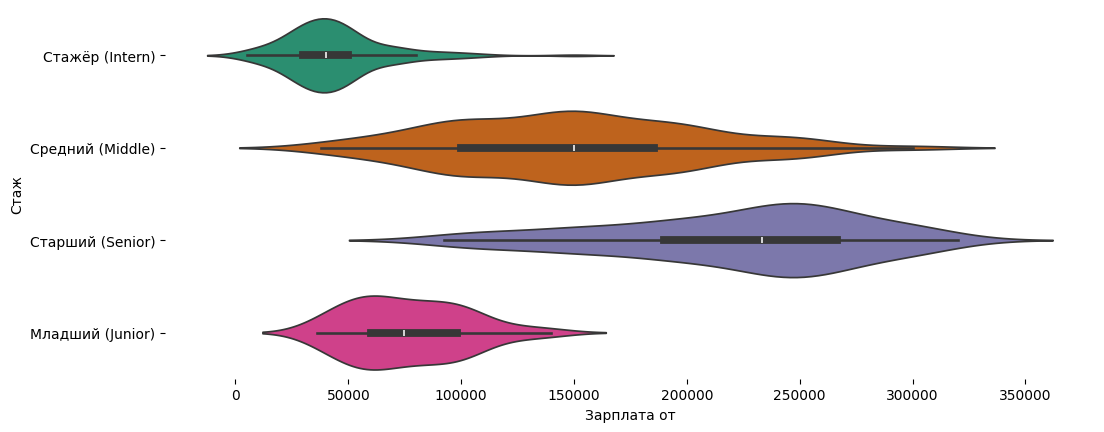

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_cleaned['Стаж'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_cleaned, x='Зарплата от', y='Стаж', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [38]:
df_out

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
0,2024-06-27 16:50:48,Архитектор программного обеспечения,Старший (Senior),333333.333333,500000.0,Москва,2024-07-01 23:06:03,0,Полный рабочий день,Нет
48,2024-06-30 09:27:18,Разработчик мобильных приложений,Старший (Senior),250000.000000,600000.0,Удаленно,2024-07-01 23:06:19,3,Полный рабочий день,Да
66,2024-07-01 13:34:02,Бэкенд разработчик,Старший (Senior),646590.000000,831330.0,Удаленно,2024-07-01 23:06:26,0,Полный рабочий день,Да
171,2024-06-25 11:32:13,Бэкенд разработчик,Средний (Middle),300000.000000,350000.0,Удаленно,2024-07-01 23:07:01,0,Полный рабочий день,Да
197,2024-06-25 16:47:25,Бэкенд разработчик,Средний (Middle),250000.000000,280000.0,Удаленно,2024-07-01 23:07:11,1,Полный рабочий день,Да
...,...,...,...,...,...,...,...,...,...,...
3052,2024-06-23 08:55:45,ML разработчик,Старший (Senior),323295.000000,484942.5,Токио (Япония),2024-07-01 23:23:03,0,Полный рабочий день,Нет
3065,2024-06-26 16:19:00,Разработчик приложений,Старший (Senior),350000.000000,525000.0,Казань,2024-07-01 23:23:07,0,Полный рабочий день,Нет
3084,2024-06-26 10:57:41,Фронтенд разработчик,Старший (Senior),461850.000000,692775.0,Удаленно,2024-07-01 23:23:13,0,Полный рабочий день,Да
3121,2024-06-12 02:18:02,Бэкенд разработчик,Старший (Senior),280000.000000,350000.0,Удаленно,2024-07-01 23:23:25,0,Полный рабочий день,Да


<ipython-input-39-cfc02006cdae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_out, x='Зарплата от', y='Стаж', inner='box', palette='Dark2')


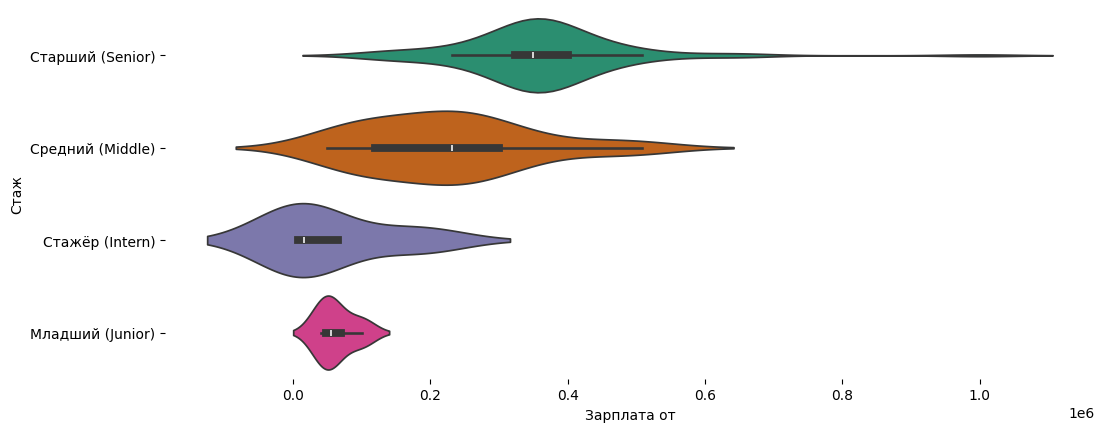

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_out['Стаж'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_out, x='Зарплата от', y='Стаж', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [40]:
df_cleaned['Наименьшая зарплата'] = df_cleaned['Зарплата от']
df_cleaned['Наибольшая зарплата'] = df_cleaned['Зарплата до']
df_cleaned.groupby(['Стаж']).agg({
    'Зарплата от': 'mean',
    'Зарплата до': 'mean',
    'Наименьшая зарплата': 'min',
    'Наибольшая зарплата': 'max'
})

,Зарплата от,Зарплата до,Наименьшая зарплата,Наибольшая зарплата
Стаж,,,,
Младший (Junior),76603.638889,114507.285714,36000.0,210000.0
Средний (Middle),149837.469807,222570.903986,38000.0,450000.0
Стажёр (Intern),44094.047619,68574.107143,5000.0,225000.0
Старший (Senior),222169.874016,333443.287402,92370.0,480000.0


In [41]:
df_cleaned.drop(['Наименьшая зарплата', 'Наибольшая зарплата'], axis=1).groupby('Стаж').describe()

Зарплата от                                                  \
                       count           mean           std      min       25%   
Стаж                                                                           
Младший (Junior)        42.0   76603.638889  25405.795692  36000.0   60000.0   
Средний (Middle)       276.0  149837.469807  55852.871115  38000.0  100000.0   
Стажёр (Intern)        112.0   44094.047619  22535.385239   5000.0   30000.0   
Старший (Senior)       127.0  222169.874016  55408.959008  92370.0  190000.0   

                                                         Зарплата до  \
                            50%            75%       max       count   
Стаж                                                                   
Младший (Junior)   74475.000000   98092.500000  140000.0        42.0   
Средний (Middle)  150000.000000  185221.666667  300000.0       276.0   
Стажёр (Intern)    40000.000000   50000.000000  150000.0       112.0   
Старший (Senior)  233333.333333  266666.666667  320000.0       127.0   

                                 ...                     Число сотрудников  \
                           mean  ...       75%       max             count   
Стаж                             ...                                         
Младший (Junior)  114507.285714  ...  150000.0  210000.0              42.0   
Средний (Middle)  222570.903986  ...  270000.0  450000.0             276.0   
Стажёр (Intern)    68574.107143  ...   80000.0  225000.0             112.0   
Старший (Senior)  333443.287402  ...  400000.0  480000.0             127.0   

                                                                 
                      mean        std  min  25%  50%  75%   max  
Стаж                                                             
Младший (Junior)  3.809524  12.992001  0.0  0.0  0.0  2.0  83.0  
Средний (Middle)  5.061594  17.117981  0.0  0.0  0.0  2.0  83.0  
Стажёр (Intern)   0.919643   2.401720  0.0  0.0  0.0  1.0  12.0  
Старший (Senior)  5.251969  13.571661  0.0  0.0  0.0  6.5  83.0  

[4 rows x 24 columns]

In [42]:
df_out.groupby('Стаж').describe()

Зарплата от                                          \
                       count           mean            std       min   
Стаж                                                                   
Младший (Junior)         4.0   62500.000000   26299.556397   40000.0   
Средний (Middle)        21.0  224819.761905  122709.154747   50000.0   
Стажёр (Intern)          4.0   55601.666667   86541.186149    6000.0   
Старший (Senior)        70.0  364580.000000  124367.606835  120000.0   

                                                               Зарплата до  \
                       25%            50%       75%        max       count   
Стаж                                                                         
Младший (Junior)   47500.0   55000.000000   70000.0   100000.0         4.0   
Средний (Middle)  120000.0  230925.000000  300000.0   508035.0        21.0   
Стажёр (Intern)     6500.0   15833.333333   64935.0   184740.0         4.0   
Старший (Senior)  323295.0  350000.000000  400000.0  1000000.0        70.0   

                                 ...                      Число сотрудников  \
                           mean  ...       75%        max             count   
Стаж                             ...                                          
Младший (Junior)  187500.000000  ...  212500.0   250000.0               4.0   
Средний (Middle)  336267.619048  ...  350000.0   692775.0              21.0   
Стажёр (Intern)   122370.000000  ...  167370.0   369480.0               4.0   
Старший (Senior)  548414.850000  ...  600000.0  1492950.0              70.0   

                                                                
                     mean        std  min  25%  50%  75%   max  
Стаж                                                            
Младший (Junior)  0.00000   0.000000  0.0  0.0  0.0  0.0   0.0  
Средний (Middle)  1.52381   3.558357  0.0  0.0  0.0  0.0  10.0  
Стажёр (Intern)   0.00000   0.000000  0.0  0.0  0.0  0.0   0.0  
Старший (Senior)  3.40000  13.920478  0.0  0.0  0.0  1.0  83.0  

[4 rows x 24 columns]